In [39]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<class 'numpy.ndarray'>
(360, 500)


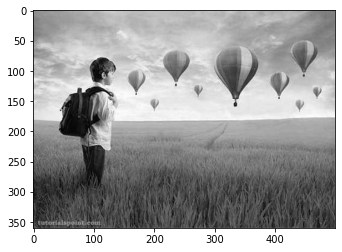

In [40]:
# Reading image (grayscale)
img = cv2.imread('/content/drive/MyDrive/Coding Assignments IVP/grayscale.jpeg', 0)    
# img is a 3-dimensional numpy array (third number indicates channel)
print(type(img)) 
print(img.shape) 
plt.imshow(img, cmap ='gray') 

In [28]:
def Conv2(img,kernel):
  # Extracting image and filter dimentions 
  img_h ,img_w = img.shape
  kernel_h, kernel_w = kernel.shape

  # Defining padding size
  pad_h = int((kernel_h-1)/2)
  pad_w = int((kernel_w-1)/2)

  # Zero padding to the image
  # Added zeros to each edge side of the image should be the same amount of padding dimentions 
  padded_img = np.pad(img,((pad_h, pad_h), (pad_w, pad_w)), 'constant')

  # Creating output buffer
  output = np.zeros((img_h, img_w))

  # Performing convolution with given kernel
  for i in range(img_h):
    for j in range(img_w):

      # Selecting patch - extracting desired indexes in each loop
      patch = padded_img[i:i + kernel_h, j:j + kernel_w]

      # Convolving patch and kernel
      output[i,j] = np.sum(patch * kernel)

  return output

In [29]:
def awgn(img,n):
  # Generating Gaussian Noise with 0 mean and standard deviation n
  # with the same shape as our image
  noise = np.random.randn(*img.shape)*n
  # Add the noise to the input image
  noisy_image = img + noise

  return noisy_image

In [65]:
def gaussian_filter(sigma,k):
  # Calculating kernel size
  m = int(np.ceil(k * sigma))
  """
   We want the center of the grid to be at (0,0), 
   and we want the grid to extend out to a distance 
   of 2.5 standard deviations in each direction. 
  """
  # Generate the x and y coordinate arrays - creating 2D filter using meshgrid
  x, y = np.meshgrid(np.linspace(-m//2, m//2, m), np.linspace(-m//2, m//2, m))
  # Calculate the Gaussian values using the formula
  g = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
  # Normalize the filter to sum to 1
  g /= np.sum(g)
  return g

Noise level: 0.05, Kernel size: 3
PSNR for denoised image by Gaussian Filter: 28.876789694998575
PSNR for denoised image by Average Filter: 28.11179582693446
Noise level: 0.05, Kernel size: 5
PSNR for denoised image by Gaussian Filter: 28.12831166447836
PSNR for denoised image by Average Filter: 25.659592827845174
Noise level: 0.05, Kernel size: 7
PSNR for denoised image by Gaussian Filter: 27.858081644904075
PSNR for denoised image by Average Filter: 24.52814193292955
Noise level: 0.1, Kernel size: 3
PSNR for denoised image by Gaussian Filter: 25.615449255380472
PSNR for denoised image by Average Filter: 26.258302383082235
Noise level: 0.1, Kernel size: 5
PSNR for denoised image by Gaussian Filter: 26.053569378990225
PSNR for denoised image by Average Filter: 25.208209671243544
Noise level: 0.1, Kernel size: 7
PSNR for denoised image by Gaussian Filter: 26.135835579491875
PSNR for denoised image by Average Filter: 24.33459916732196
Noise level: 0.3, Kernel size: 3
PSNR for denoised im

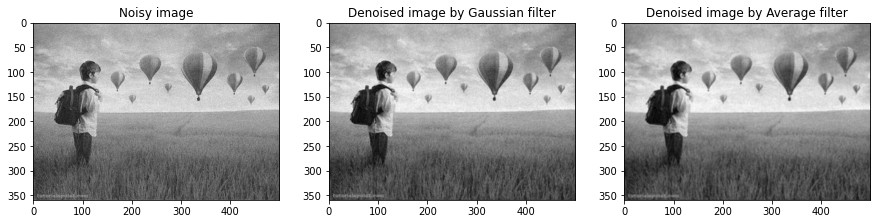

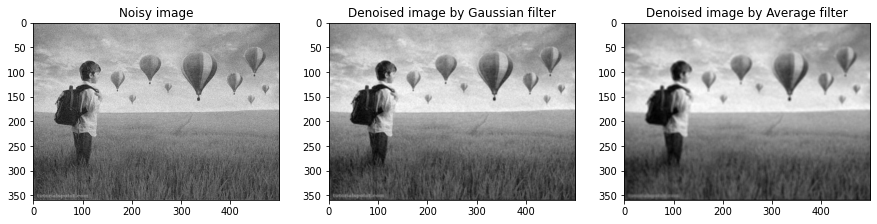

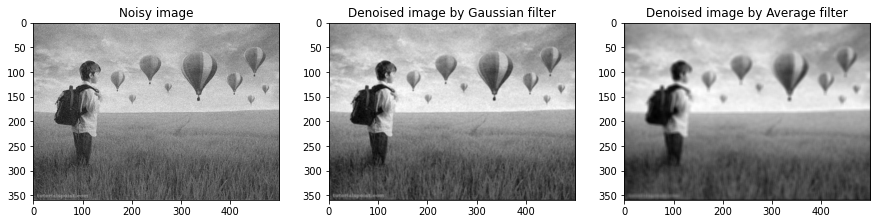

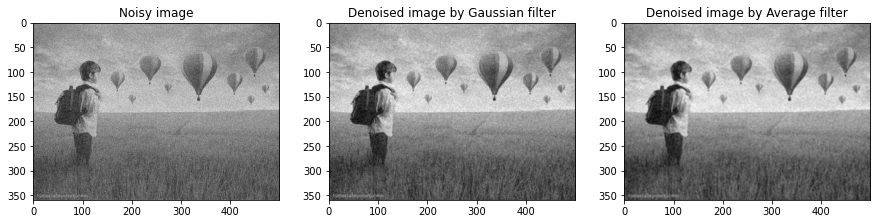

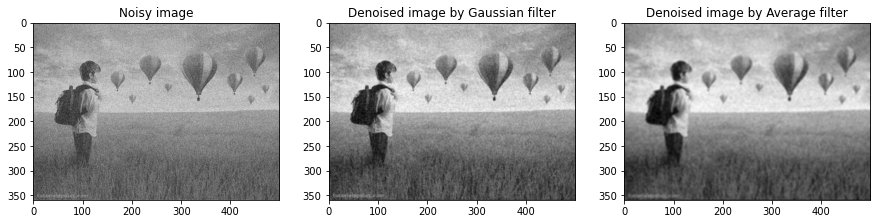

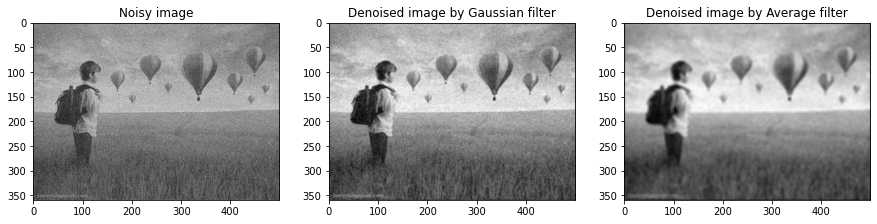

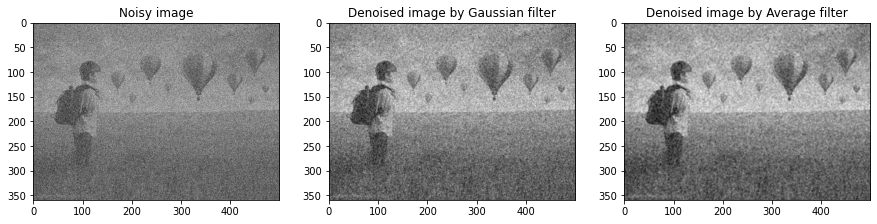

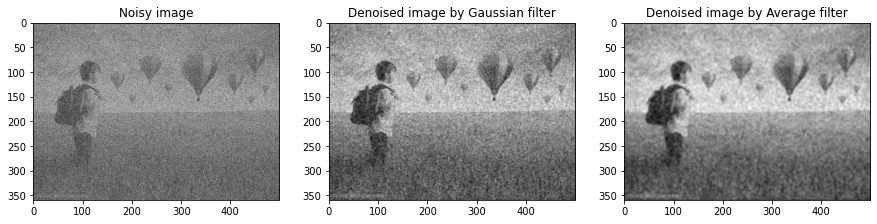

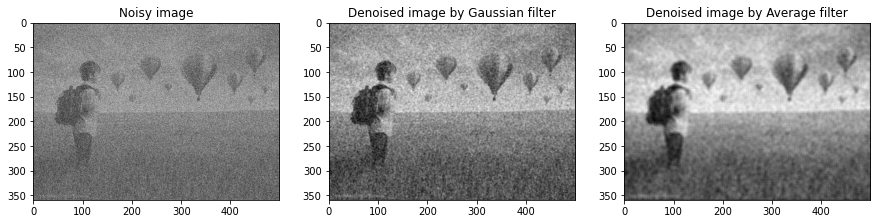

In [67]:
# Defining PSNR
def psnr(Original_img, Denoised_img):
    mse = np.mean((Original_img - Denoised_img)**2)
    psnr = -10 * np.log10(mse)
    return psnr

# Trying different level of noise and different kernel sizes
N = [0.05, 0.1, 0.3]
S = [3,5,7]
sigma = 1
for i in range(len(N)):
  for j in range(len(S)):
    # Normalizing
    img_normalized = img / 255.0
    # Generating a noisy version of our input image
    noisy_img = awgn(img_normalized, N[i])

    # Generating Gaussian filter and average filter
    filter1 = gaussian_filter(sigma, S[j])
    filter2 = np.ones((S[j],S[j])) / (S[j]**2)

    # Applying Gaussian filter of size 5x5 and average filter of size 5x5
    denoised_img_gauss = Conv2(noisy_img, filter1)
    denoised_img_average = Conv2(noisy_img, filter2)

    # Ploting 
    plt.figure(figsize = (15, 15))
    plt.subplot(1, 3, 1)
    plt.imshow(noisy_img, cmap ='gray')
    plt.title('Noisy image')
    plt.subplot(1, 3, 2)
    plt.imshow(denoised_img_gauss, cmap='gray')
    plt.title('Denoised image by Gaussian filter')
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_img_average, cmap='gray')
    plt.title('Denoised image by Average filter')

    print(f'Noise level: {N[i]}, Kernel size: {S[j]}')

    # Calculating PSNR between original image and Gaussian denoised image
    psnr_gaussian = psnr(img_normalized, denoised_img_gauss)
    print(f'PSNR for denoised image by Gaussian Filter: {psnr_gaussian}')
    # Calculating PSNR between original image and average denoised image
    psnr_average = psnr(img_normalized, denoised_img_average)
    print(f'PSNR for denoised image by Average Filter: {psnr_average}')


In [62]:
# Sanity check 
from skimage import metrics

# Calculate PSNR
psnr1 = metrics.peak_signal_noise_ratio(img_normalized, denoised_img_gauss)
psnr2 = metrics.peak_signal_noise_ratio(img_normalized, denoised_img_average)
# Print the PSNR value
print("PSNR Gaussian filtered image:", psnr1)
print("PSNR Average filtered image:", psnr2)

PSNR Gaussian filtered image: 19.06603949549438
PSNR Average filtered image: 22.131651723118047
